In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,MaxPool2D,Conv2D,Flatten,BatchNormalization
import sklearn
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#Input training data and split into testing and training datasets
traindata=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
xtrain,xtest,ytrain,ytest=train_test_split(traindata.drop(columns='label'),traindata['label'],test_size=0.2,random_state=4)
xtrain=xtrain.astype('float64')/255       #Normalize testing and training set pixel values
xtest=xtest.astype('float64')/255
ytrain=tf.keras.utils.to_categorical(ytrain)   #One hot encoding for number labels
ytest=tf.keras.utils.to_categorical(ytest)

In [3]:
xtrain=xtrain.to_numpy()
xtest=xtest.to_numpy()


In [4]:
xtrain.shape

(33600, 784)

In [5]:
xtrain=xtrain.reshape(-1,28,28,1)
xtrain.shape
xtest=xtest.reshape(-1,28,28,1)

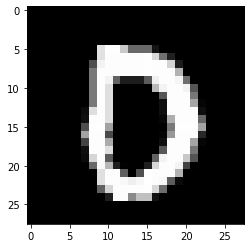

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# pick a sample to plot
sample = 1
image = xtrain[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [7]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(Conv2D(32,kernel_size=(5,5),padding='same',activation='relu'))
BatchNormalization()
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
BatchNormalization()
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(48,activation='relu'))
model.add(Dense(10,activation='softmax'))

2023-01-01 17:01:01.992801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-01 17:01:02.125230: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-01 17:01:02.126097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-01 17:01:02.127828: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=50,batch_size=16)

2023-01-01 17:01:04.905524: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-01 17:01:06.366939: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2100/2100 [==============================] - 15s 4ms/step - loss: 0.1691 - accuracy: 0.9481
Epoch 2/50
2100/2100 [==============================] - 8s 4ms/step - loss: 0.0647 - accuracy: 0.9808
Epoch 3/50
2100/2100 [==============================] - 8s 4ms/step - loss: 0.0555 - accuracy: 0.9845
Epoch 4/50
2100/2100 [==============================] - 8s 4ms/step - loss: 0.0437 - accuracy: 0.9872
Epoch 5/50
2100/2100 [==============================] - 8s 4ms/step - loss: 0.0370 - accuracy: 0.9894
Epoch 6/50
2100/2100 [==============================] - 8s 4ms/step - loss: 0.0359 - accuracy: 0.9902
Epoch 7/50
2100/2100 [==============================] - 10s 5ms/step - loss: 0.0258 - accuracy: 0.9929
Epoch 8/50
2100/2100 [==============================] - 10s 5ms/step - loss: 0.0282 - accuracy: 0.9931
Epoch 9/50
2100/2100 [==============================] - 8s 4ms/step - loss: 0.0273 - accuracy: 0.9931
Epoch 10/50
2100/2100 [==============================] - 8s 4ms/step - loss: 0.0257 - accu

KeyboardInterrupt: 

In [9]:
model.evaluate(xtest,ytest)

263/263 [==============================] - 1s 3ms/step - loss: 0.0877 - accuracy: 0.9882


[0.08770587295293808, 0.9882143139839172]

In [11]:
#Load prediction dataset
x_pred=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
x_pred=x_pred.astype('float64')/255
x_pred=x_pred.to_numpy().reshape(-1,28,28,1)
y_pred=model.predict(x_pred)

In [12]:
#Writer function to write label with maximum activation
import csv
with open('/kaggle/working/output.csv','w') as f:
    writer=csv.writer(f)
    writer.writerow(['ImageID','Label'])
    j=1
    for x in y_pred:
        for i in range(10):
            if x[i]==max(x):
                writer.writerow([j,i])
                break
        j+=1
    